<a href="https://colab.research.google.com/github/schumbar/CMPE256/blob/main/assignment_02/CMPE256_assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Assignment 02: Starbucks Hot Beverages Clustering
**By Shawn Chumbar**

Sources:
ChatGPT to assist with verification of code. Professor mentioned that we could use ChatGPT to verify that our solution is correct.

### Problem Statement
A newly opened Starbucks coffee shop manager wanted to increase loyal customer to his newly opened shop. As part of increasing customer loyalty, he collected data of sale of hot beverages vs popular times of a typical day - in this case Wednesday.

The goal of the manager is to offer a sales coupons to customers based on time visit to the store.

He consulted you, data scientist, and wanted you to develop clustering (maximum three popular time slots of the day) to offer a coupon. How do you approach?

### Data Exploration
The first thing that needs to be done is data exploration and cleaning the data. In the case of this assignment, The data is pretty straightforward and does not need to be cleaned.

In [ ]:
%pip install kmodes

In [ ]:
%pip install numpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

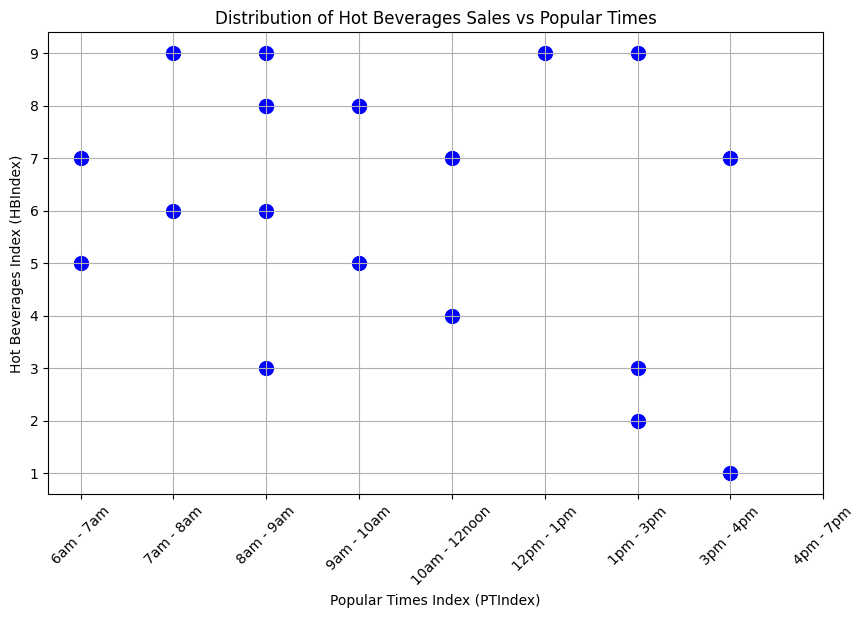

In [ ]:

# Provided data points
data_points = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

# Time slots mapping
time_slots = {
    1: '6am - 7am',
    2: '7am - 8am',
    3: '8am - 9am',
    4: '9am - 10am',
    5: '10am - 12noon',
    6: '12pm - 1pm',
    7: '1pm - 3pm',
    8: '3pm - 4pm',
    9: '4pm - 7pm'
}

# Scatter plot of the data points
plt.figure(figsize=(10, 6))
plt.scatter(data_points['PTIndex'], data_points['HBIndex'], s=100, c='blue', marker='o')
plt.title('Distribution of Hot Beverages Sales vs Popular Times')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.xticks(ticks=range(1, 10), labels=[time_slots[i] for i in range(1, 10)], rotation=45)
plt.grid(True)
plt.show()


Just looking at the graph above, we can see a variety of things. For example, we can see that the busiest time for the coffee shop would be 8:00am-9:00am.


We can see that the most popular drink throughout the day would be drink number  
9: Coffee of the day

The least popular drink throughout the whole day would be the following drink numbers:   
4: Cappuccino  
2: Cafe Latte  
1: Coffee  

Let's continue using single-link, complete-link, and average-link to cluster the data points.

### Assumption: Increase sales of least popular drinks
We are going to assume that we want to **increase sales of the lowest sold drinks during the most popular times.**

The business case for this would be that the starbucks owner wants to increase revenue generated by the least popular drinks by providing discounts on those drinks during the most popular times.

In [ ]:
# Dictionaries to be able to provide output
time_slots = {
    1: '6am - 7am',
    2: '7am - 8am',
    3: '8am - 9am',
    4: '9am - 10am',
    5: '10am - 12noon',
    6: '12pm - 1pm',
    7: '1pm - 3pm',
    8: '3pm - 4pm',
    9: '4pm - 7pm'
}

drinks = {
    1: 'Coffee',
    2: 'Café Latte',
    3: 'Café Mocha',
    4: 'Cappuccino',
    5: 'Caramel Macchiato',
    6: 'Café Americano',
    7: 'Hot Chocolate',
    8: 'Espresso Shot',
    9: 'Coffee Of the Day'
}

In [ ]:
# Data points from excel file
data_points = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

In [ ]:
# data frame conversion
data = pd.DataFrame(data_points)

In [ ]:
data

,PTIndex,HBIndex
0,1,5
1,1,7
2,2,6
3,2,9
4,3,6
5,3,8
6,3,8
7,3,9
8,4,8
9,4,8


In [ ]:
data.empty

False

In [ ]:
data.shape

(20, 2)

In [ ]:
data.dtypes

PTIndex    int64
HBIndex    int64
dtype: object

Now since we have verified the data has been loaded correctly, we are going to prepare and standardize the data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data Preparation
# Pivot table so rows = time slots and columns = drinks
pivot_data = data.groupby(['PTIndex', 'HBIndex']).size().unstack(fill_value=0)

# Standardize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivot_data)

In [ ]:
pivot_data

HBIndex,1,2,3,4,5,6,7,8,9
PTIndex,,,,,,,,,
1,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,1,0,2,1
4,0,0,0,0,1,0,0,2,0
5,0,0,0,1,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1
7,0,1,1,0,0,0,0,0,1
8,1,0,0,0,0,0,1,0,0


In [ ]:
scaled_data

array([[0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0.]])

Now since the data preparation and standardization is complete, the next step is to perform the acutal clustering. We are going to perform single, complete, and average link clustering on the dataset. Notice above that we now have a table which includes the PT Index and the HBIndex. However, the table now shows the number of drinks that were sold. We can now use this with clustering to figure out which least popular drinks we can sell during the most popular times.

In [ ]:
# Apply Hierarchical clustering with different linkage methods
clustering = AgglomerativeClustering(n_clusters=3, linkage='single').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    least_popular_drink = cluster_data.sum(axis=0).idxmin() # Least popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Single-Linkage, in Cluster {cluster}, consider offering coupons for {drinks[least_popular_drink]} during {time_slots[most_popular_time_slot]} time slot.")



With Single-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Single-Linkage, in Cluster 1, consider offering coupons for Café Latte during 9am - 10am time slot.
With Single-Linkage, in Cluster 2, consider offering coupons for Coffee during 1pm - 3pm time slot.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

clustering = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    least_popular_drink = cluster_data.sum(axis=0).idxmin() # Least popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Complete-Linkage, in Cluster {cluster}, consider offering coupons for {drinks[least_popular_drink]} during {time_slots[most_popular_time_slot]} time slot.")



With Complete-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Complete-Linkage, in Cluster 1, consider offering coupons for Café Latte during 10am - 12noon time slot.
With Complete-Linkage, in Cluster 2, consider offering coupons for Coffee during 9am - 10am time slot.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    least_popular_drink = cluster_data.sum(axis=0).idxmin() # Least popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Average-Linkage, in Cluster {cluster}, consider offering coupons for {drinks[least_popular_drink]} during {time_slots[most_popular_time_slot]} time slot.")



With Average-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Average-Linkage, in Cluster 1, consider offering coupons for Café Latte during 10am - 12noon time slot.
With Average-Linkage, in Cluster 2, consider offering coupons for Coffee during 9am - 10am time slot.


#### Single-Link Output
In Cluster 0, consider offering coupons for Coffee during the 8am-9am time slot.   
In Cluster 1, consider offering coupons for Café Latte during the 9am-10am time slot.   
In Cluster 2, consider offering coupons for Coffee during the 1pm-3pm time slot.   

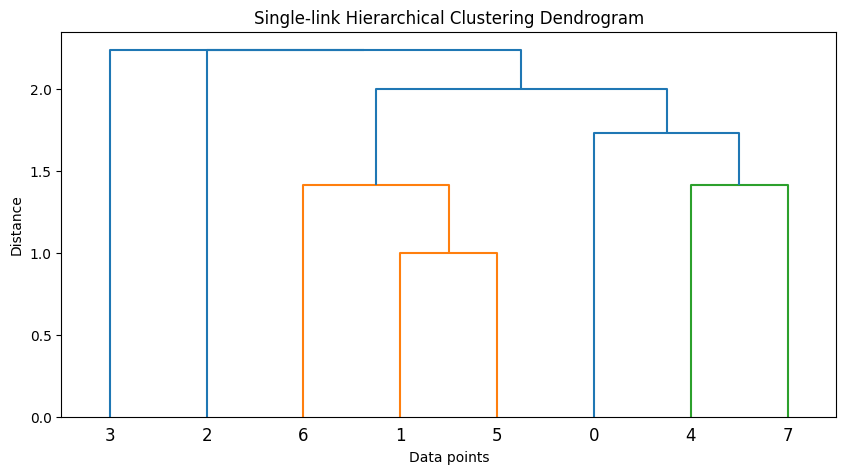

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(pivot_data, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Single-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Complete-Link Output
In Cluster 0, consider offering coupons for Coffee during the 8am-9am time slot.   
In Cluster 1, consider offering coupons for Café Latte during the 10am-12noon time slot.   
In Cluster 2, consider offering coupons for Coffee during the 9am-10am time slot.   

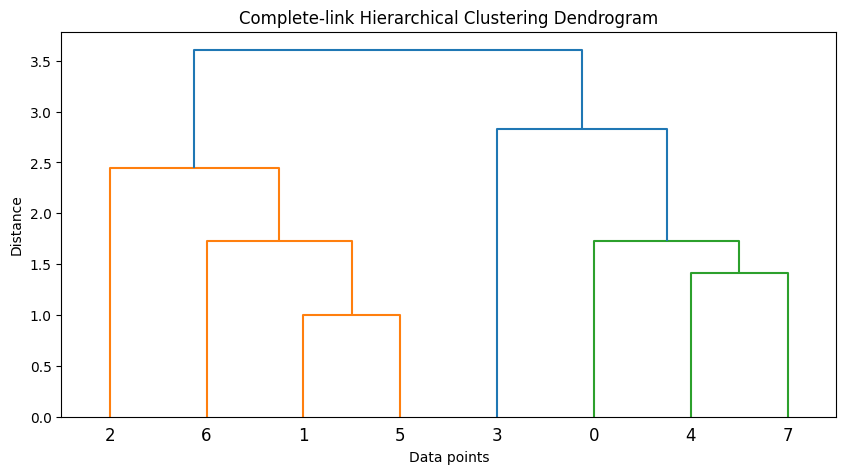

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(pivot_data, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Complete-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Average-Link Output
In Cluster 0, consider offering coupons for Coffee during the 8am-9am time slot.   
In Cluster 1, consider offering coupons for Café Latte during the 10am-12noon time slot.   
In Cluster 2, consider offering coupons for Coffee during the 9am-10am time slot.   

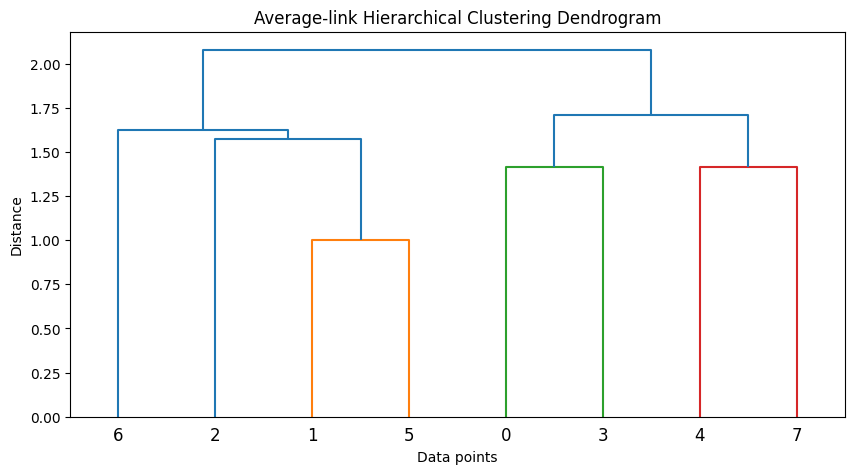

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(scaled_data, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Average-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Conclusion
It seems that regardless of which clustering method we choose, we keep getting the same drinks to provide discounts for.
Assuming that we want to **increase sales of the lowest sold drinks during the most popular times**, it would be most beneficial to include discounts on the following two drinks:
1. Cafe Latte   
2. Coffee   

The following time slots would be the best cases to offer discounts:
1. 8am-9am.  
2. 10am-12noon.  
3. 9am-10am.  


### Assumption: Increase sales of most popular drinks
In this section, we are assuming that the owner wants to increase the sales of the most popular drinks. The business case for this would be that the starbucks owner wants to provide discounts on the most popular drinks during the most popular times so that customers would be more inclined to return during least popular times. Another business case could be that the owner has too many popular drinks in stock and needs to get rid of some of the inventory.

In [ ]:
# Data points from excel file
data_points = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

In [ ]:
# data frame conversion
data = pd.DataFrame(data_points)

In [ ]:
# Data Preparation
# Pivot table so rows = time slots and columns = drinks
pivot_data = data.groupby(['PTIndex', 'HBIndex']).size().unstack(fill_value=0)

# Standardize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(pivot_data)

##### Single-Link Output


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Apply Hierarchical clustering with different linkage methods
clustering = AgglomerativeClustering(n_clusters=3, linkage='single').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    most_popular_drink = cluster_data.sum(axis=0).idxmax() # most popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Single-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")



With Single-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Single-Linkage, in Cluster 1, consider offering coupons for Coffee during 9am - 10am time slot.
With Single-Linkage, in Cluster 2, consider offering coupons for Coffee during 1pm - 3pm time slot.


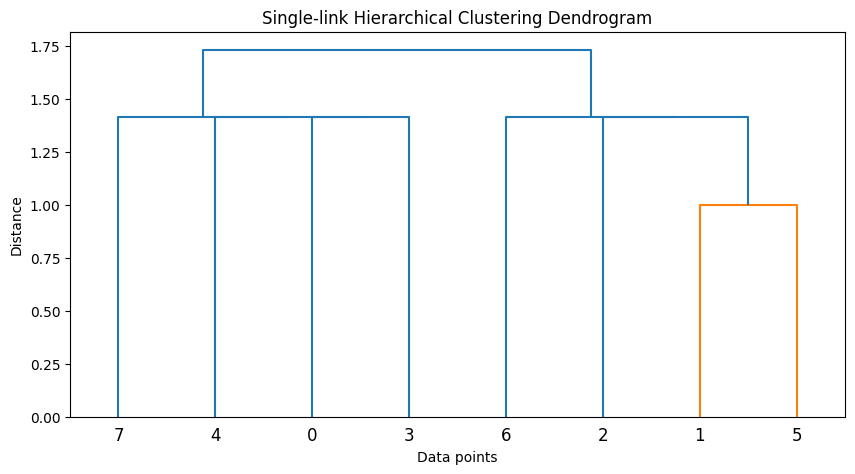

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(scaled_data, method='single')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Single-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Complete-Link Output

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

clustering = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    most_popular_drink = cluster_data.sum(axis=0).idxmax() # most popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Complete-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")



With Complete-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Complete-Linkage, in Cluster 1, consider offering coupons for Coffee during 10am - 12noon time slot.
With Complete-Linkage, in Cluster 2, consider offering coupons for Coffee during 9am - 10am time slot.


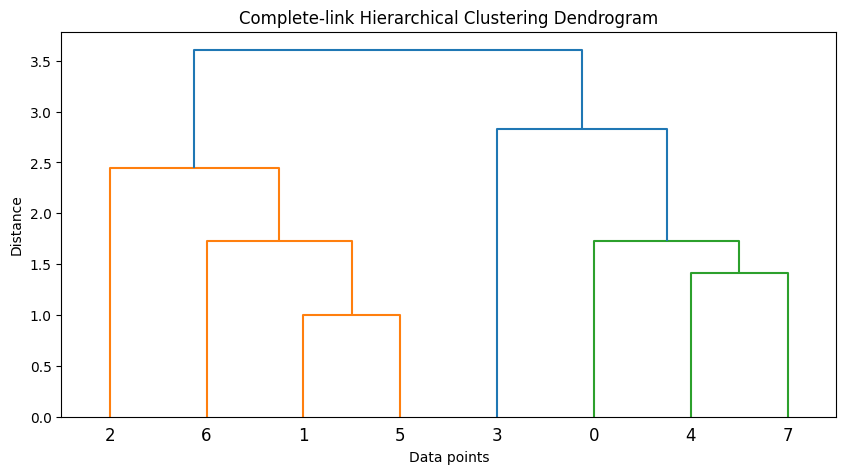

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(pivot_data, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Complete-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Average-Link Output

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit(scaled_data)
pivot_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    most_popular_drink = cluster_data.sum(axis=0).idxmax() # most popular drink in each cluster
    most_popular_time_slot = cluster_data.sum(axis=1).idxmax()   # time slot w/ highest total sales in cluster
    print(f"With Average-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")



With Average-Linkage, in Cluster 0, consider offering coupons for Coffee during 8am - 9am time slot.
With Average-Linkage, in Cluster 1, consider offering coupons for Coffee during 10am - 12noon time slot.
With Average-Linkage, in Cluster 2, consider offering coupons for Coffee during 9am - 10am time slot.


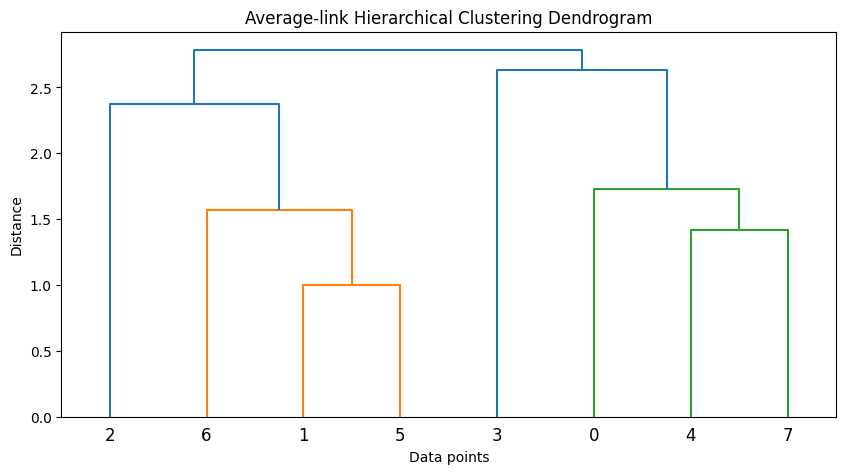

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(pivot_data, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Average-link Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


#### Conclusion
Assumption: We want to increase the sales of the most popular drinks.

In conclusion, if we want to increase the sales of the most popular drinks during the most popular times, we will want to offer coupons during the following time slots:
1. 8am-9am
2. 9am-10am
3. 10am-12noon


### Assumption: Offer coupon during most popular time (don't care about drink type)
For this section, we are going to assume that we do not care for the least or most popular drink. For this section all we want to do is to offer coupons during the most popular times (for example, 15% off your entire order).

In [ ]:
# Convert data_points to DataFrame
data = pd.DataFrame(data_points)

# Sum counts for each time slot
time_counts = data['PTIndex'].value_counts().sort_index()

# Convert to DataFrame
time_data = pd.DataFrame({'Counts': time_counts})

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_data)

In [ ]:
data

,PTIndex,HBIndex
0,1,5
1,1,7
2,2,6
3,2,9
4,3,6
5,3,8
6,3,8
7,3,9
8,4,8
9,4,8


In [ ]:
time_counts

1    2
2    2
3    5
4    3
5    2
6    1
7    3
8    2
Name: PTIndex, dtype: int64

In [ ]:
time_data

,Counts
1,2
2,2
3,5
4,3
5,2
6,1
7,3
8,2


In [ ]:
scaled_data

array([[0.25],
       [0.25],
       [1.  ],
       [0.5 ],
       [0.25],
       [0.  ],
       [0.5 ],
       [0.25]])

#### Single-Link Output

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical clustering with different linkage methods
clustering = AgglomerativeClustering(n_clusters=3, linkage="single").fit(scaled_data)
time_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = time_data[time_data['Cluster'] == cluster]
    # Identify the time slot with the highest total sales in the cluster
    most_popular_time_slot = cluster_data['Counts'].idxmax()
    print(f"With Single-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")


With Single-Linkage, in Cluster 0, consider offering coupons during 9am - 10am time slot.
With Single-Linkage, in Cluster 1, consider offering coupons during 8am - 9am time slot.
With Single-Linkage, in Cluster 2, consider offering coupons during 12pm - 1pm time slot.


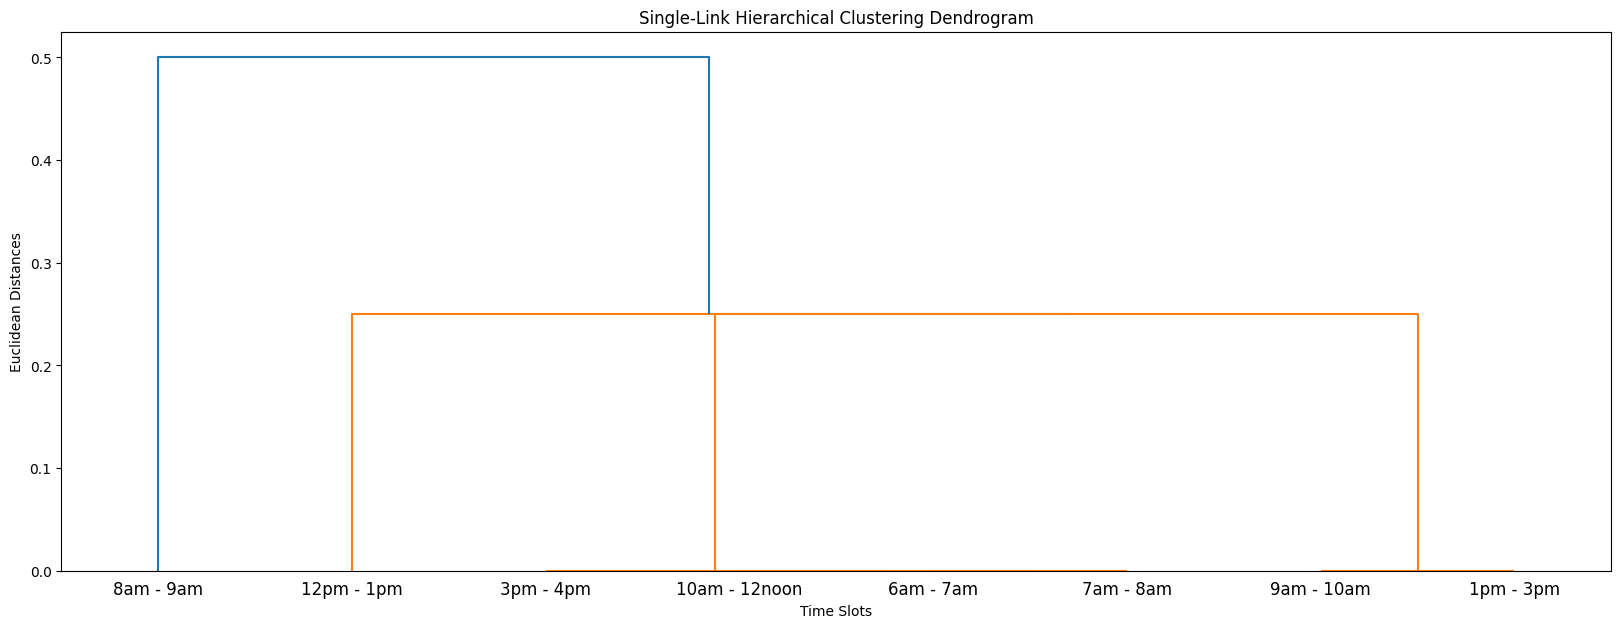

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(scaled_data, method='single')

# Plot dendrogram
labels = [time_slots[i] for i in time_counts.index]

plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix, labels=labels)
plt.title('Single-Link Hierarchical Clustering Dendrogram')
plt.xlabel('Time Slots')
plt.ylabel('Euclidean Distances')
plt.show()

#### Complete-link Output

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical clustering with different linkage methods
clustering = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(scaled_data)
time_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = time_data[time_data['Cluster'] == cluster]
    # Identify the time slot with the highest total sales in the cluster
    most_popular_time_slot = cluster_data['Counts'].idxmax()
    print(f"With Complete-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")


With Complete-Linkage, in Cluster 0, consider offering coupons during 9am - 10am time slot.
With Complete-Linkage, in Cluster 1, consider offering coupons during 8am - 9am time slot.
With Complete-Linkage, in Cluster 2, consider offering coupons during 12pm - 1pm time slot.


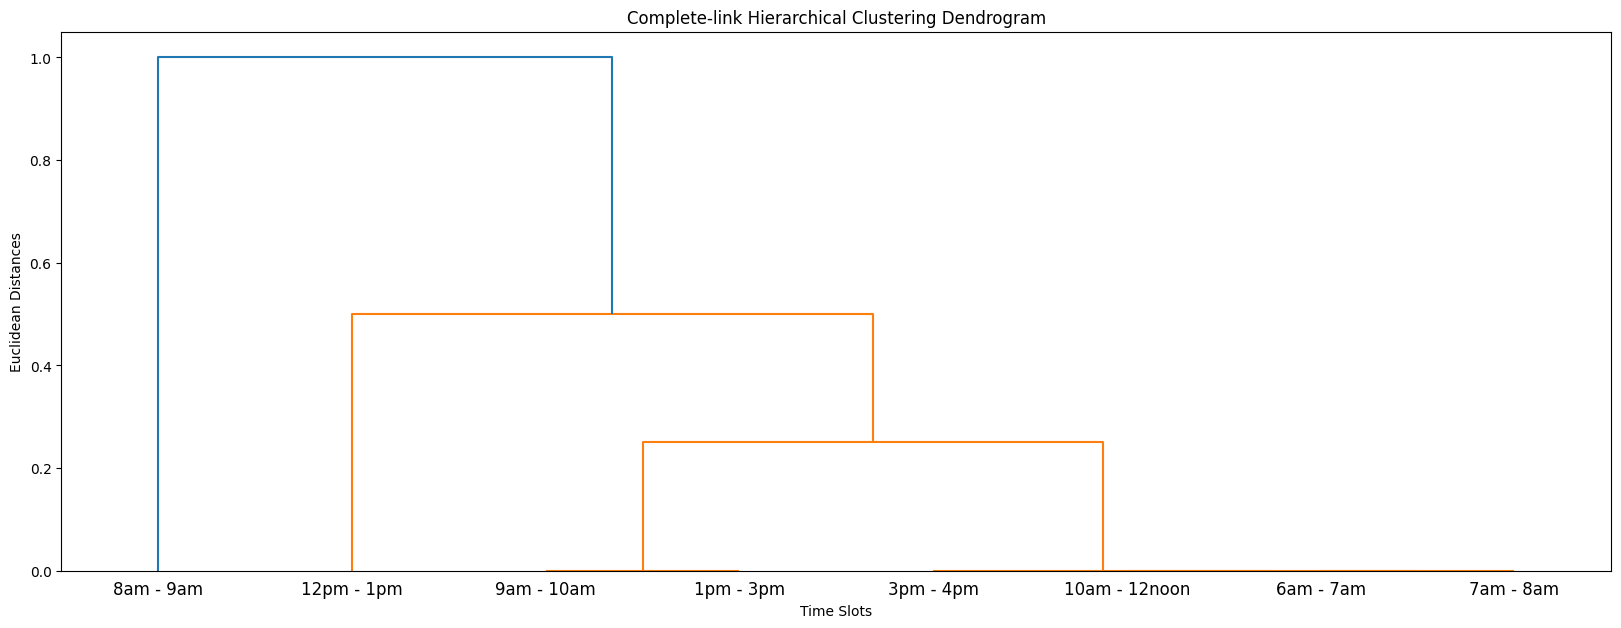

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(scaled_data, method='complete')

# Plot dendrogram
labels = [time_slots[i] for i in time_counts.index]

plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix, labels=labels)
plt.title('Complete-link Hierarchical Clustering Dendrogram')
plt.xlabel('Time Slots')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Convert data_points to DataFrame
data = pd.DataFrame(data_points)

# One-Hot Encoding PTIndex
one_hot_encoded_data = pd.get_dummies(data['PTIndex'], prefix='PTIndex')

# Linkage methods
linkage_methods = ['single']

# Analyze each linkage method
for linkage in linkage_methods:
    # Apply Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage).fit(one_hot_encoded_data)
    data['Cluster'] = clustering.labels_

    # Analyze each cluster
    print(f"Analysis for {linkage.capitalize()} Linkage:")
    for cluster in range(3):
        cluster_data = data[data['Cluster'] == cluster]
        most_popular_time_slot = cluster_data['PTIndex'].mode().values[0]  # Get the mode of PTIndex in the cluster
        print(f"  - For Cluster {cluster}, consider offering coupons during time slot {time_slots[most_popular_time_slot]}.")


Analysis for Single Linkage:
  - For Cluster 0, consider offering coupons during time slot 8am - 9am.
  - For Cluster 1, consider offering coupons during time slot 3pm - 4pm.
  - For Cluster 2, consider offering coupons during time slot 12pm - 1pm.


#### Average Link Output

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical clustering with different linkage methods
clustering = AgglomerativeClustering(n_clusters=3, linkage="average").fit(scaled_data)
time_data['Cluster'] = clustering.labels_

# Analyze each cluster
for cluster in range(3):
    cluster_data = time_data[time_data['Cluster'] == cluster]
    # Identify the time slot with the highest total sales in the cluster
    most_popular_time_slot = cluster_data['Counts'].idxmax()
    print(f"With Average-Linkage, in Cluster {cluster}, consider offering coupons during {time_slots[most_popular_time_slot]} time slot.")


With Average-Linkage, in Cluster 0, consider offering coupons during 9am - 10am time slot.
With Average-Linkage, in Cluster 1, consider offering coupons during 8am - 9am time slot.
With Average-Linkage, in Cluster 2, consider offering coupons during 12pm - 1pm time slot.


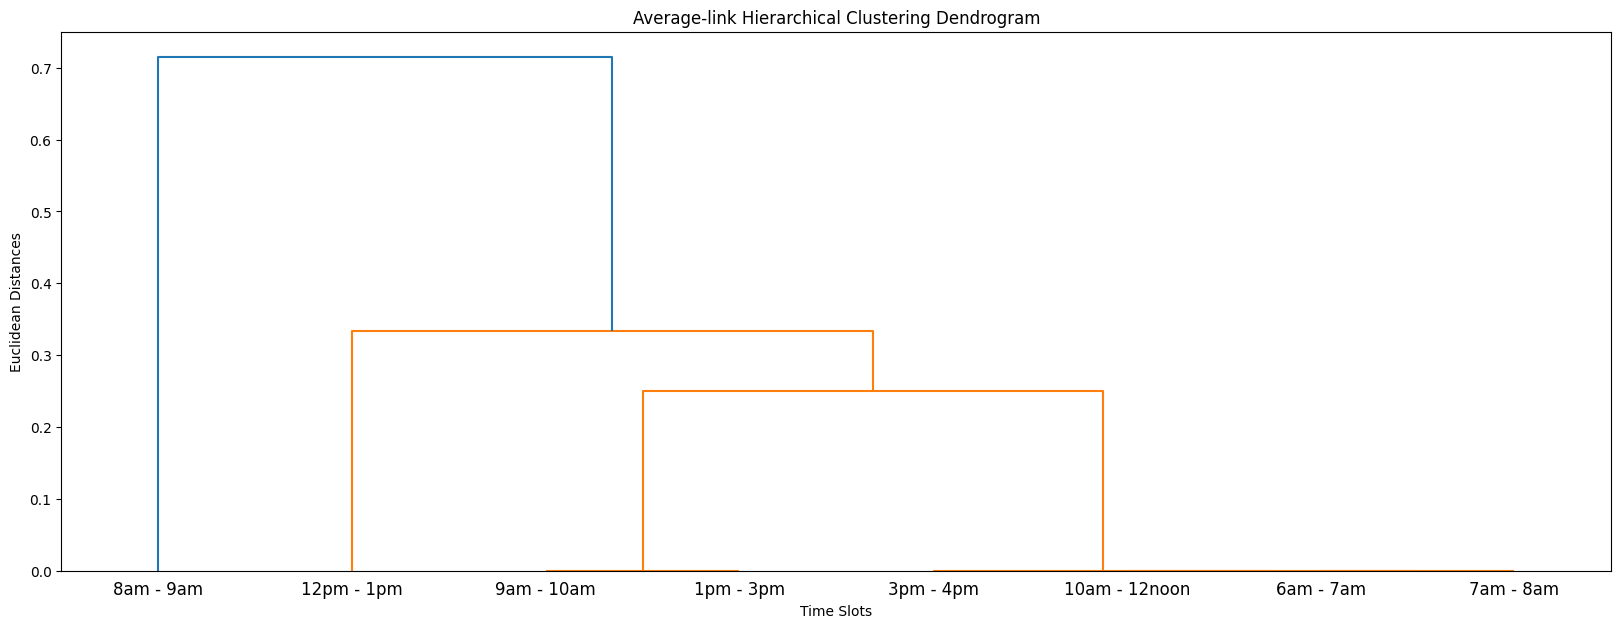

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(scaled_data, method='average')

# Plot dendrogram
labels = [time_slots[i] for i in time_counts.index]

plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix, labels=labels)
plt.title('Average-link Hierarchical Clustering Dendrogram')
plt.xlabel('Time Slots')
plt.ylabel('Euclidean Distances')
plt.show()

#### Conclusion
When we do not factor drink popularity into context, it seems that the best time to offer coupons is the following times:

1. 9AM-10AM
2. 8AM-9AM
3. 12PM-1PM